### 1. Import Libraries and Dataframe

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [3]:
import warnings 
warnings.filterwarnings("ignore")

In [4]:
path = r'C:\Users\kshifera\Desktop\CF_Course\Immersion\Achievement_6\WorldEnergyConsumptionAnalysis'

In [5]:
# import dataframe
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'T4.csv'), index_col = False)

In [6]:
# check 
df.head()

,Unnamed: 0,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,...,wind_energy_per_capita,wind_share_elec,wind_share_energy,electrification_rate,fossils?,renewables?,nuclear?,continent,gdp_per_capita,income_group
0,0,Afghanistan,2000,AFG,19542986.0,1.128379e+10,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,4.45,yes,yes,no,Asia,577.383256,low-income
1,1,Afghanistan,2001,AFG,19688634.0,1.102127e+10,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,9.29,yes,yes,no,Asia,559.778453,low-income
2,2,Afghanistan,2002,AFG,21000258.0,1.880487e+10,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,14.13,yes,yes,no,Asia,895.459054,low-income
3,3,Afghanistan,2003,AFG,22645136.0,2.107434e+10,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,18.97,yes,yes,no,Asia,930.634461,low-income
4,4,Afghanistan,2004,AFG,23553554.0,2.233257e+10,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,23.81,yes,yes,no,Asia,948.161439,low-income


In [7]:
# remove the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,wind_energy_per_capita,wind_share_elec,wind_share_energy,electrification_rate,fossils?,renewables?,nuclear?,continent,gdp_per_capita,income_group
0,Afghanistan,2000,AFG,19542986.0,1.128379e+10,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,4.45,yes,yes,no,Asia,577.383256,low-income
1,Afghanistan,2001,AFG,19688634.0,1.102127e+10,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,9.29,yes,yes,no,Asia,559.778453,low-income
2,Afghanistan,2002,AFG,21000258.0,1.880487e+10,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,14.13,yes,yes,no,Asia,895.459054,low-income
3,Afghanistan,2003,AFG,22645136.0,2.107434e+10,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,18.97,yes,yes,no,Asia,930.634461,low-income
4,Afghanistan,2004,AFG,23553554.0,2.233257e+10,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,23.81,yes,yes,no,Asia,948.161439,low-income


### 2. Elbow Technique

In [8]:
# create a subset without categorical data
df_sub = df[['population','gdp','carbon_intensity_elec','electricity_demand','electricity_generation','fossil_electricity','fossil_share_elec','greenhouse_gas_emissions','net_elec_imports','per_capita_electricity','renewables_electricity','gdp_per_capita']]

In [9]:
r_cl = range(1, 10) # define range of potential clusters in the dataframe
kmeans = [KMeans(n_clusters=i) for i in r_cl] # define k-means clusters in the range 

In [10]:
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))] # define rate of variation for the given cluster option
score

[-8.963886148465185e+27,
 -2.1740110241934628e+27,
 -8.508475707460417e+26,
 -4.823118172545784e+26,
 -3.133676888237501e+26,
 -2.2800344767640812e+26,
 -1.677473064698797e+26,
 -1.2744820742621479e+26,
 -1.0219002112387575e+26]

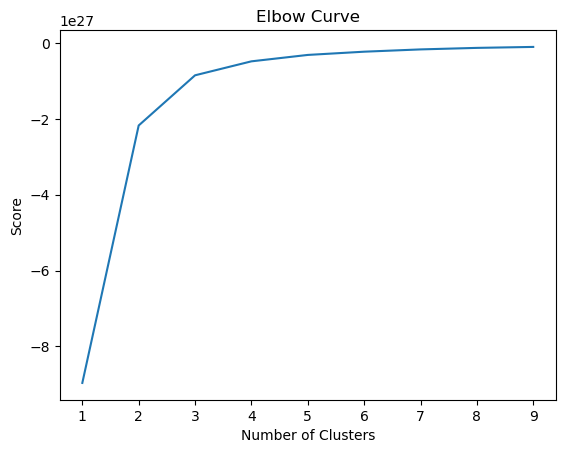

In [11]:
# plot the elbow curve using PyLab.
pl.plot(r_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### There are two clearly delineated elbows, which means there are three optimal clusters in the data

### 3. K-means Clustering

In [12]:
# k-means object
kmeans = KMeans(n_clusters = 3) 

In [13]:
# fit the k-means object to the data.
kmeans.fit(df_sub)

KMeans(n_clusters=3)

In [14]:
# attach the number of clusters to the dataframe
df_sub['clusters'] = kmeans.fit_predict(df_sub)

In [15]:
# check
df_sub.head()

,population,gdp,carbon_intensity_elec,electricity_demand,electricity_generation,fossil_electricity,fossil_share_elec,greenhouse_gas_emissions,net_elec_imports,per_capita_electricity,renewables_electricity,gdp_per_capita,clusters
0,19542986.0,1.128379e+10,255.319,0.57,0.47,0.16,34.043,0.12,0.1,24.050,0.31,577.383256,0
1,19688634.0,1.102127e+10,118.644,0.69,0.59,0.09,15.254,0.07,0.1,29.967,0.50,559.778453,0
2,21000258.0,1.880487e+10,144.928,0.79,0.69,0.13,18.841,0.10,0.1,32.857,0.56,895.459054,0
3,22645136.0,2.107434e+10,255.319,1.04,0.94,0.31,32.979,0.24,0.1,41.510,0.63,930.634461,0
4,23553554.0,2.233257e+10,269.663,0.99,0.89,0.33,37.079,0.24,0.1,37.786,0.56,948.161439,0


In [16]:
# check how many observations fall into each cluster
df_sub['clusters'].value_counts()

clusters
0    2905
2     193
1      32
Name: count, dtype: int64

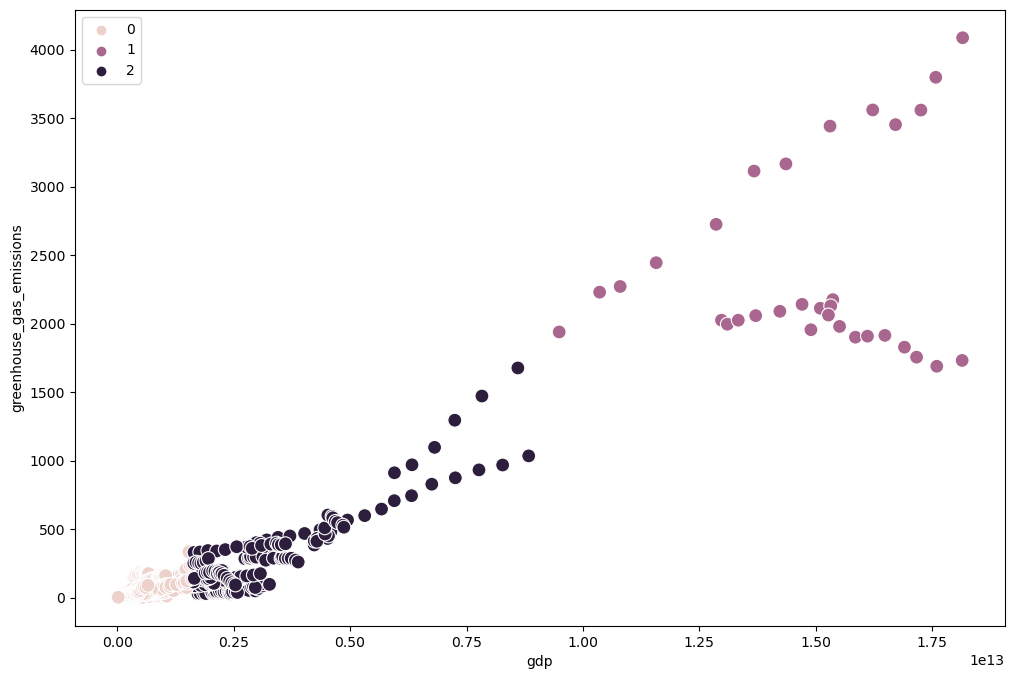

In [17]:
# plot the clusters for the "gdp" and "greenhouse_gas_emissions" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['gdp'], y=df_sub['greenhouse_gas_emissions'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('gdp') # Label x-axis.
plt.ylabel('greenhouse_gas_emissions') # Label y-axis.
plt.show()

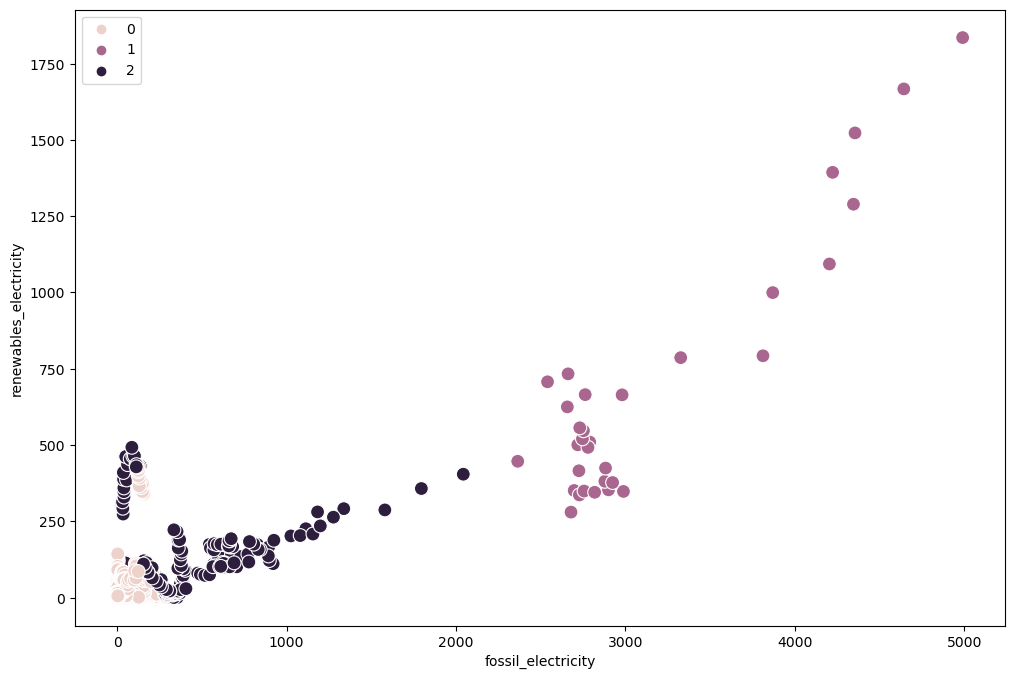

In [18]:
# plot the clusters for the "fossil_electricity" and "renewables_electricity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['fossil_electricity'], y=df_sub['renewables_electricity'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('fossil_electricity') # Label x-axis.
plt.ylabel('renewables_electricity') # Label y-axis.
plt.show()

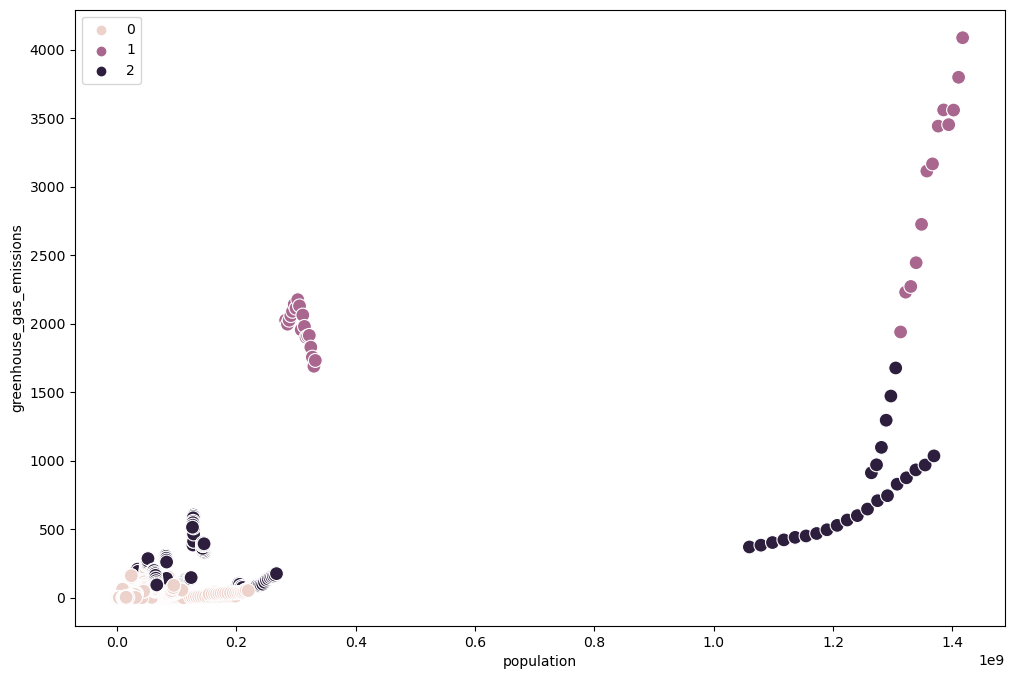

In [19]:
# plot the clusters for the "population" and "greenhouse_gas_emissions" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['population'], y=df_sub['greenhouse_gas_emissions'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('population') # Label x-axis.
plt.ylabel('greenhouse_gas_emissions') # Label y-axis.
plt.show()

### 4. Descriptive Statistics

In [20]:
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark purple'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'pink'

In [21]:
df_sub.groupby('cluster').agg({'gdp':['mean', 'median'], 
                         'fossil_electricity':['mean', 'median'], 
                         'renewables_electricity':['mean', 'median'],
                          'population':['mean', 'median'],
                              'greenhouse_gas_emissions':['mean','median']})

gdp               fossil_electricity            \
                     mean        median               mean    median   
cluster                                                                
dark purple  3.036149e+12  2.479390e+12         394.471088   296.870   
pink         2.012810e+11  5.928031e+10          26.443783     4.310   
purple       1.487732e+13  1.528750e+13        3163.292188  2803.605   

            renewables_electricity             population               \
                              mean   median          mean       median   
cluster                                                                  
dark purple             132.151192   99.420  2.562258e+08  120149896.0   
pink                     11.068310    2.200  1.950922e+07    8664976.0   
purple                  697.143438  533.605  7.378648e+08  325908992.0   

            greenhouse_gas_emissions           
                                mean   median  
cluster                                        
dark purple               279.844301   193.62  
pink                       17.627050     3.41  
purple                   2414.237187  2101.06

#### Summary of clustering analysis result
1. biggest emitters are countries with gdp exceeding 1trillion USD, where as it is the lowest for economies below 175billion USD. The largest cluster of emitters however contribute the least data points, where as the least emitters have the largest amount of observation in the dataframe. 
2. electricity from renewables is the largest for systems where electricity from fossil fuels exceeds 2500 units, however this is the cluster with the smallest observation in the dataframe. whereas the cluster for the lowest electricity from fossil fuels has also a corresponding low contribution from renewables while accounting for the largest observation in the dataframe, the relationship between the two variables is not clear for the third group. 
3. countries with population size of 200 million or less contribute the least greenhouse gas emissions, while having the largest observation in the dataframe. the relationship between the two variables for the other two clusters isnot clearcut. 
4. the cluster relating gdp to greenhouse gas emissions indicate that there is a correlation between them, even though linear relationship did not hold. 

In [22]:
# Export
df_sub.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'T5_sub.csv'))